https://school.programmers.co.kr/learn/courses/30/lessons/60057

문자열에서 같은 값이 연속해서 나타나는 것을 그 문자의 개수와 반복되는 값으로 표현하여 더 짧은 문자열로 줄여서 표현하는 알고리즘

예시1 )
'aabbaccc'인 경우 '2a2ba3c'(문자가 반복되지 않아 한 번만 나타나는 경우 1은 생략)와 같이 표현할 수 있는데, 이러한 방식은 반복되는 문자가 적은 경우 압축률이 낮다는 단점이 있다.

예시2 )
'abcabcdede'와 같은 문자열은 전혀 압축되지 않는다.

이러한 단점을 해결하기 위해 문자열을 1개 이상의 단위로 잘라 압축하여 더 짧은 문자열로 표현할 수 있는지 방법을 찾아보려고 한다.

예시1 )
'ababcdcdababcdcd'인 경우 문자를 1개 단위로 자르면 전혀 압축되지 않지만, 2개 단위로 잘라서 압축한다면 '2ab2cd2ab2cd'로 표현할 수 있다. 다른 방법으로 8개 단위로 잘라서 압축한다면 '2ababcdcd'로 표현할 수 있으며, 이때가 가장 짧게 압축하여 표현할 수 있는 방법이다.

예시2 )
'abcabcdede'와 같은 경우, 문자를 2개 단위로 잘라서 압축하면 'abcabc2de'가 되지만, 3개 단위로 자른다면 '2abcdede'가 되어 3개 단위가 가장 짧은 압축 방법이 된다. 이때 3개 단위로 자르고 마지막에 남는 문자열은 그대로 붙여주면 된다.

압축할 문자열 s가 매개변수로 주어질 때, 위에 설명한 방법으로 1개 이상 단위로 문자열을 잘라 압축하여 표현한 문자열 중 가장 짧은 것의 길이를 return하도록 solution 함수 완성하기

제한 사항 )
- s의 길이는 1 이상 1000 이하이다.
- s는 알파벳 소문자로만 이루어져 있다.

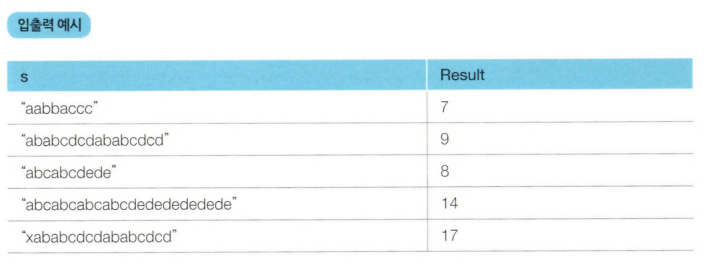

[입출력 예시에 대한 설명]


**입출력 예시 #1**
문자열을 1개 단위로 잘라 압축했을 때 가장 짧다.

**입출력 예시 #2**
문자열을 8개 단위로 잘라 압축했을 때 가장 짧다.

**입출력 예시 #3**
문자열을 3개 단위로 잘라 압축했을 때 가장 짧다.

**입출력 예시 #4**
문자열을 2개 단위로 자르면 'abcabcabcabc6de'가 된다.
문자열을 3개 단위로 자르면 '4abcdedede4de4de'가 된다.
문자열을 4개 단위로 자르면 'abcabcabcabcabc3dede'가 된다.
문자열을 6개 단위로 자르면, '2abcabc2dedede'가 되며, 이때의 길이가 14로 가장 짧다.

**입출력 예시 #5**
문자열은 제일 앞부터 정해진 길이만큼 잘라야 한다. 따라서 주어진 문자열을 x / ababcdcd / ababcdcd로 자르는 것은 불가능하다. 이 경우 어떻게 문자열을 잘라도 압축되지 않으므로 가장 짧은 길이는 17이 된다.

In [15]:
def solution(s) :
    answer = len(s)
    
    for step in range(1, len(s)//2 + 1) : # step개 단위로 잘라
        new = ""
        start = s[0:step]
        count = 1
        
        for i in range(step, len(s), step) :
            if start == s[i:i+step] :  # 이전상태와 동일하다면
                count += 1
            else :                         # 다른 문자열이 나왔다면
                new += str(count) + start if count >= 2 else start
                start = s[i:i+step]
                count = 1
                    
        new += str(count) + start if count >= 2 else start # 남아 있는 문자열
    
        answer = min(answer, len(new))
    return answer

In [16]:
s = input()
solution(s)

aabbaccc


7

In [17]:
s = input()
solution(s)

abcabcabcabcdededededede


14

In [44]:
# 두 번째 풀이
from collections import deque

def dq(s, num) :
    q = deque(list(s))
    
    prev = []
    
    if num > 0 :
        for _ in range(num) :
            if q :
                prev.append(q.popleft())
                
    ''' 없어도 됨
    else :
        for _ in range(abs(num)) :
            if q :
                prev.append(q.pop())
        prev.reverse()
    ''' 
        
    return prev

In [79]:
def solution(s) :
    answer = len(s)
    
    for i in range(1, answer // 2 + 1) :
        q = deque(list(s))
        result = ""
        cnt = 1
        
        prev = dq(s, i)
        nq = deque(x for x in q if x not in prev)

        post = dq(nq, i)

        if prev == post :
            cnt += 1
        else :
            result += str(cnt) + ''.join(prev) if cnt >= 2 else ''.join(prev)
            prev = post # 다시 초기화
            cnt = 1

    # 남아 있는 문자열
    result += str(cnt) + ''.join(prev) if cnt >= 2 else ''.join(prev)

    # 만들어지는 것 중 가장 짧은 것
    answer = min(answer, len(result))

    return answer

In [80]:
s = input()
solution(s)

aabbaccc


7